#  2^3 Factorial Experiments on Students' Performance 

##### *Yusuf Abolarinwa*

# 1) Overview

Academic success affects a child's self esteem and motivations. It can also be an early indicator of a child's pursuit for higher education. In Nigeria, most parents are of the opinion that private secondary schools are a better choice for their child's academic development than the public ones. Over the years, this situation has increased enrollment into the private schools.

This project aims to find out whether factors like School, Gender and Specialization influences academic performance.

# 2) Problem Statement 

The problem to be solve will help policymakers and stakeholders in making improvements in the sector through informed decisions. For that, we need to carry out an experiment that will:

* Screen factors in our investigation with the smallest number of runs.
* Examine individual factors and their interactions on academic performance.
* Provide information at a lower cost.

# 3) Getting the data

* The *West Africa Examination Council (WAEC)* results of two schools (one private & one public) were obtained. However, there was no randomization in the selection of the participating schools.

* Because there are only two levels for each factor, we assume that academic performance is approximately linear over the range of the factor levels chosen.




### 3.1) __Score (y)__ 
This is the response variable, y — the students' performance. Although it is _ordinal_ in nature, it is assumed to be _continuous_ to satisfied the condition of linear regression dependent variable. It was gauged by coding their grades in Maths + English language using nine points item scale; A1 to F9 (A1=8, B2=7, B3=6, C4=5, C5=4, C6=3, D7=2, E8=1, F9=0)


### 3.2) __School Type (X1)__
Given the disparity in learning between schools, parents are concerned about their child's performance. The _School Type_ as a likely influence was introduced at two levels: Public school(-1) and Private school(1) 

### 3.3) __Gender (X2)__
Nigeria being a society of people with different sociocultural backgrounds and belief system. It is important to investigate the pattern of partcipation and academic performance between the female and male students. Therefore, _Gender_ as a possible factor was fixed at two levels: Female(-1) and Male(1)

### 3.4) __Specialization (X3)__
Some parents relates academic success to their child's course or specialization. Among parents, there is a notion that certain students are more "serious" than others depending on their course of study. So, this justifies the inclusion of _Specialization_ as a factor in the experiment, and it was set at two levels: Humanities(-1) and Science(1)


In [1]:
from pyDOE2 import fullfact
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import math
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 3) Loading  data

In [2]:
df_raw = pd.read_excel("data/full_factorial_design_academic_performance.xlsx")
df_raw

,SCH,GNDR,SPEC,MATH,ENG,SCORE
0,-1,1,-1,3,6,9
1,-1,1,1,4,5,9
2,-1,-1,1,7,6,13
3,-1,-1,-1,6,6,12
4,-1,-1,1,2,4,6
...,...,...,...,...,...,...
135,1,1,1,3,6,9
136,1,1,1,6,6,12
137,1,-1,1,6,8,14
138,1,-1,1,4,6,10


### (a) Plot Class Balance

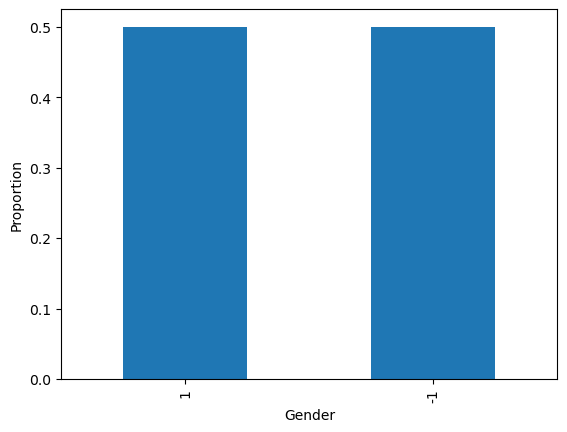

In [62]:
df_raw["GNDR"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.show()

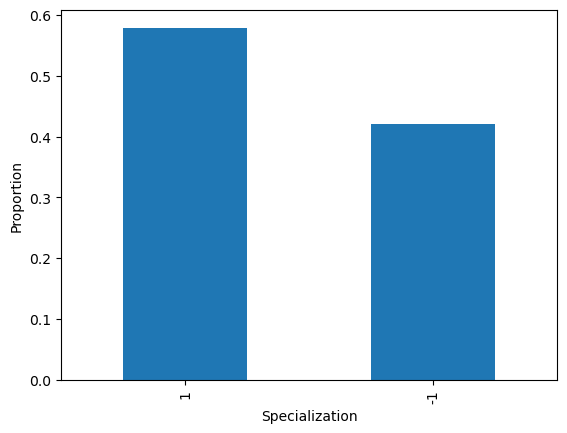

In [52]:
df_raw["SPEC"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("Specialization")
plt.ylabel("Proportion")
plt.show()

# 4) Experiment on the Students' Score in Math + English

In this section, we create two functions:

* `main_effects_plot_score()` computes and then compare estimate of the main effects (= School, Gender, and Specialization) on students' performance.
* `interaction_point_plot_score()` create plots of factors' interaction effects on students' performance at two levels.

In [18]:
def main_effects_plot_score(file_path, y_score):
    # Load data from excel
    df = pd.read_excel(file_path)
    
    # Identify factors by excluding the result column
    factors = df.columns[:-3]
        
    # Calculate main effects
    main_effects = {}
    for factor in factors:
        mean_plus = df[df[factor] == 1][y_score].mean()
        mean_minus = df[df[factor] == -1][y_score].mean()
        main_effects[factor] = mean_plus - mean_minus
    # Plot main effects
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(main_effects.keys(), main_effects.values())
    # Annotate the bars with their values
    for factor, value in main_effects.items():
        ax.text(factor, value + 0.01 * abs(value), '{:.2f}'.format(value), 
                        ha='center', va='bottom')
    ax.set_ylabel('Main Effect')
    ax.set_title('Main Effects Plot')
    plt.xticks(rotation=45, ha="right")
    plt.show()

### a) Main effect plot

In the effect plot below, SCH has the largest effect on the students' performance. Also, out of the three factors, the effect of SCH & SPEC are positive, suggesting that the two factors maximizes the student's performance if they were to be considered. The negative effect estimates from GNDR indicates a relatively small decrease in the test score from female to male students.  

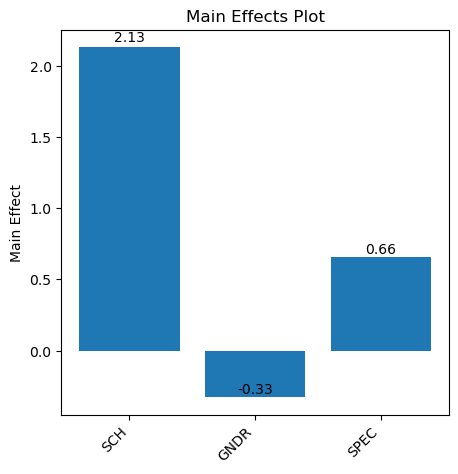

In [19]:
file_path = "data/full_factorial_design_academic_performance.xlsx"
y_score = "SCORE"
main_effects_plot_score(file_path, y_score)

In [20]:
def interaction_point_plot_score(file_path, y_score):
    
    df = pd.read_excel(file_path)
    factors = df.columns[:-3]
    interactions = list(itertools.combinations(factors, 2))
    # Calculate number of rows and columns for subplots
    cols = 3
    rows = math.ceil(len(interactions) / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(10, 10*rows/3))
    for idx, interaction in enumerate(interactions):
        row = idx // cols
        col = idx % cols
        ax = axs[row, col] if rows > 1 else axs[col]
        for level in [-1, 1]:
            subset = df[df[interaction[0]] == level]
            ax.plot(subset[interaction[1]].unique(), 
subset.groupby(interaction[1])[y_score].mean(), 'o-', 
label=f'{interaction[0]} = {level}')
        ax.set_title(f'{interaction[0]} x {interaction[1]}')
        ax.legend()
        ax.grid(True)
    # Handle any remaining axes (if there's no data to plot in them)
    for idx in range(len(interactions), rows*cols):
        row = idx // cols
        col = idx % cols
        axs[row, col].axis('off')
    plt.tight_layout()
    plt.show()

### b) Interaction effect plot
Interpretations From *LEFT* to *RIGHT*

#### (i) SCH x GNDR (= public vs private x female vs male)

* The SCH x GNDR interaction plot indicates that the private school (1) has a large positive effect on the students' performance with the male students having a better score. While in the public school, the male students had the lowest turnout of result compare to their female classmates.

#### (ii) SCH x SPEC (= public vs private x humanities vs science)

* The SCH x SPEC interaction plot shows that the private school (1) has a large positive effect on the students' performance from the humanities(-1) to the science(1) classes. Also, it reveals that science(1) students in the public school(-1) had a better performance than their humanities(-1) counterpart.

#### (iii) GNDR x SPEC (= female vs male x humanities vs science)

* The GNDR x SPEC interactions shows that female students in the humanities had the best test score. 

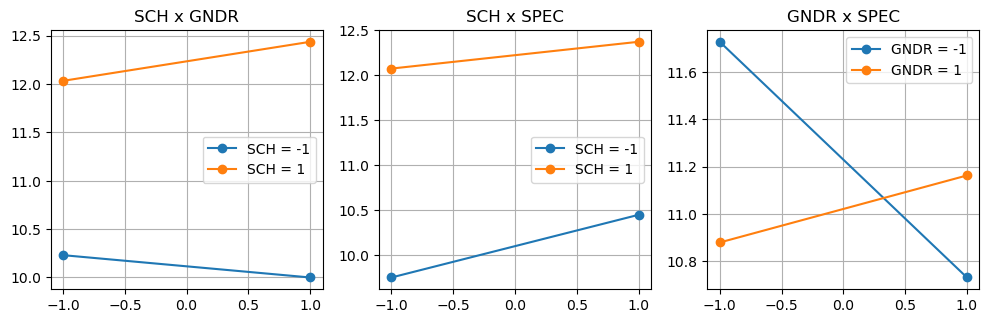

In [21]:
interaction_point_plot_score(file_path, y_score)

### c) Statistical Significance of the experiment: Analysis of Variance Test on Students' performance

HYPOTHESIS:

*for i = 1, 2, 3*

*Here the TAUs represent the treatment means, i.e. factors & their interactions*

* `Null Hypothesis, H0: TAU1 = TAU2 = TAU3 = 0`          

 *The null hypothesis is telling us that the factors & their interactions are the same and has no effect on the student's performance* 

* `Alternative Hypothesis, H1: TAUi != 0 at least one i` 
 
 *The alternative hypothesis is of the opinion that the factors & their interactions are not the same that at least one has an effect on the student's performance* 



DECISION RULE:

Reject null hypothesis, H0 if p-values is less than alpha = 0.05

#### (i) ANOVA Table

For the factorial analysis of variance, the following assumptions were made:

* The observations are independent
* Residuals are normally distributed
* Homogeneity of error variances

In [22]:
df = df_raw.copy()

# Fit the model
formula = 'SCORE ~ SCH + GNDR + SPEC + SCH:GNDR + SCH:SPEC + GNDR:SPEC + SCH:GNDR:SPEC'

model = ols(formula, data=df).fit()
# Perform ANOVA and print the results
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
SCH,1.0,158.578571,158.578571,43.334585,9.944714e-10
GNDR,1.0,0.258070,0.258070,0.070523,7.909917e-01
SPEC,1.0,8.364878,8.364878,2.285861,1.329481e-01
SCH:GNDR,1.0,2.645596,2.645596,0.722959,3.967146e-01
SCH:SPEC,1.0,1.829141,1.829141,0.499847,4.808134e-01
GNDR:SPEC,1.0,1.039625,1.039625,0.284097,5.949246e-01
SCH:GNDR:SPEC,1.0,18.036207,18.036207,4.928734,2.811981e-02
Residual,132.0,483.040768,3.659400,NaN,NaN


### d) Communicate results

#### (i) Percent Contribution

* It measures the percentage contribution of each model term (i.e. both factors & the error term) relative to the total sum of squares.
* It gives a rough but effective guide to the relative importance of each model term to academic performance. 


In [23]:
# Extracted sum of squares from the ANOVA table
sslist = list(anova_table["sum_sq"])

# Total sum of squares
ssto = sum(sslist)

# Compute the percentage contribution of the sum of squares
perc_ss = []
for ss in sslist:
    ssperc = (ss/ssto)*100
    perc_ss.append(ssperc)

In [24]:
# Put percentage contribution into series
perc_cont = pd.Series(perc_ss[:-1], index=anova_table.index[:-1]).sort_values()


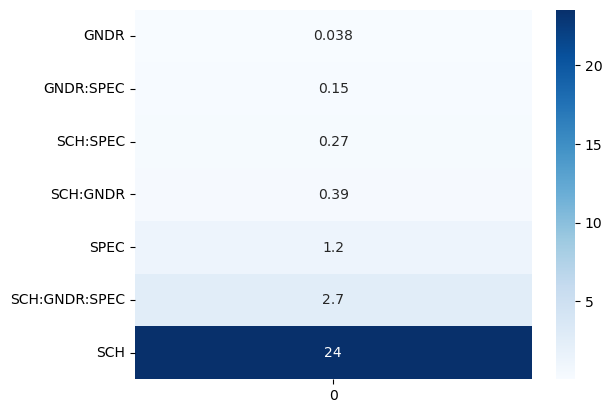

In [25]:
sns.heatmap(perc_cont.to_frame(), annot=True, cmap='Blues');

The main effect of `SCH(School)` contributes 24 percent of the total variability, whereas the main effect of `SPEC(Specialization)` and the `SCH:GNDR:SPEC` interaction account for about 1.2 and 2.7 percent, respectively. This is an indication that a large chunk of the variability (about 70%) in this experiment is in the residuals. In other words, about 70 percent of the variability in the students' performance could not be explained by the factors or independent variables in this experiment.

#### (ii) Conclusion

Reading the ANOVA TABLE bottom-up:

* `SCH x GNDR x SPEC` 

DECISION RULE: Since the *p-value = 0.02811* is less than *alpha = 0.05*. We will reject the null hypothesis, H0 and conclude that interaction effect of School, Gender, and Specialization is significant.  

* `GNDR x SPEC` 

DECISION RULE: Since the *p-value = 0.5949* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of Gender and Specialization is not significant. 

* `SCH x SPEC` 

DECISION RULE:  Since the *p-value = 0.4808* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of School and Specialization is not significant.

* `SCH x GNDR` 

DECISION RULE:  Since the *p-value = 0.3967* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of School&Gender is not significant.

* `SPEC` 

DECISION RULE:  Since the *p-value = 0.1329* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that single effect of Specialization is not significant.

* `GNDR` 

DECISION RULE:  Since the *p-value = 0.79099* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that single effect of Gender is not significant.

* `SCH` 

DECISION RULE:  Since the *p-value = 0.0000* is less than *alpha = 0.05*. We will reject the null hypothesis, H0 and conclude that single effect of School is significant.

### e) Test diagnostic check

Violation of the ANOVA assumption can be detected either by visualization or using a formal statistical test. In this experiment, we utilize plots and graphs to provide insight on our data if it satisfies the required conditions. 

`diagnostic_plot` function computes the residuals and shows a Q-Q plot to verify the assumption of normality in the data.

In [13]:
def diagnostic_plots(model):
    # Extract residuals and predicted values from the model
    residuals = model.resid
    predicted = model.fittedvalues
    
    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))
    
    # Residuals vs Predicted
    axs[0].scatter(predicted, residuals, edgecolors='k', facecolors='none')
    axs[0].axhline(y=0, color='k', linestyle='dashed', linewidth=1)
    axs[0].set_title('Residuals vs. Predicted')
    axs[0].set_xlabel('Predicted values')
    axs[0].set_ylabel('Residuals')
    
    # Residuals vs. Runs (Order of Data Collection)
    axs[1].scatter(range(len(residuals)), residuals, edgecolors='k', 
    facecolors='none')
    axs[1].axhline(y=0, color='k', linestyle='dashed', linewidth=1)
    axs[1].set_title('Residuals vs. Run')
    axs[1].set_xlabel('Run')
    axs[1].set_ylabel('Residuals')
    
    # Q-Q plot
    sm.qqplot(residuals, line='45', fit=True, ax=axs[2])
    axs[2].set_title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()

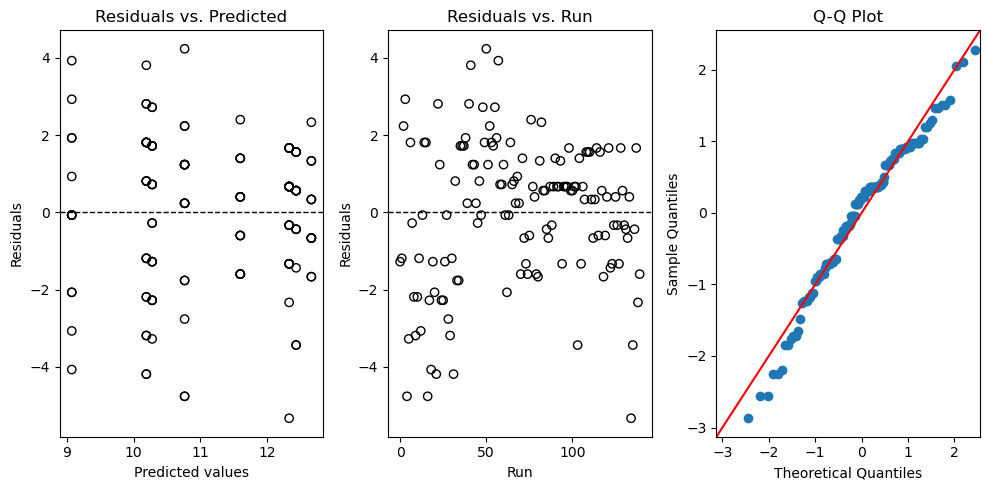

In [14]:
diagnostic_plots(model)

### f) Factorial model summary

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SCORE   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     7.447
Date:                Fri, 27 Sep 2024   Prob (F-statistic):           1.54e-07
Time:                        17:36:29   Log-Likelihood:                -285.34
No. Observations:                 140   AIC:                             586.7
Df Residuals:                     132   BIC:                             610.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.1677      0.166     67.204

# 5) Experiment on the Students' performance in Mathematics

In [38]:
def main_effects_plot_math(file_path, y_math):
    # Load data from excel
    df = pd.read_excel(file_path)
    
    # Identify factors by excluding the result column
    factors = df.columns[:-3]
        
    # Calculate main effects
    main_effects = {}
    for factor in factors:
        mean_plus = df[df[factor] == 1][y_math].mean()
        mean_minus = df[df[factor] == -1][y_math].mean()
        main_effects[factor] = mean_plus - mean_minus
    # Plot main effects
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(main_effects.keys(), main_effects.values())
    # Annotate the bars with their values
    for factor, value in main_effects.items():
        ax.text(factor, value + 0.01 * abs(value), '{:.2f}'.format(value), 
                        ha='center', va='bottom')
    ax.set_ylabel('Main Effect')
    ax.set_title('Main Effects Plot for Math Score')
    plt.xticks(rotation=45, ha="right")
    plt.show()

### a) Main effect plot

In the effect plot below, SPEC has the largest effect on maths performance. Also, out of the three factors, the effect of SCH & SPEC are positive, suggesting that the two factors maximizes the student's maths performance if they were to be considered. The negative effect estimates from GNDR indicates decreasing mathematics score from female to male students.

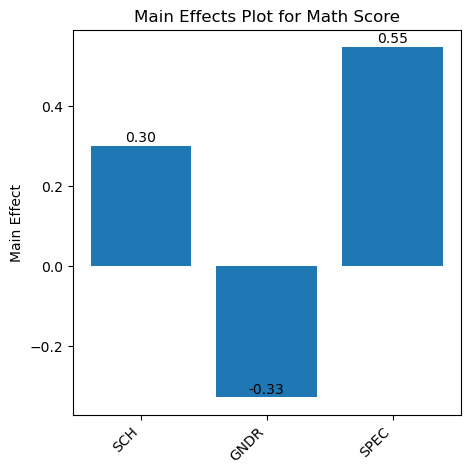

In [39]:
y_math = "MATH"
main_effects_plot_math(file_path, y_math)

In [30]:
def interaction_point_plot_math(file_path, y_math):
    
    df = pd.read_excel(file_path)
    factors = df.columns[:-3]
    interactions = list(itertools.combinations(factors, 2))
    # Calculate number of rows and columns for subplots
    cols = 3
    rows = math.ceil(len(interactions) / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(10, 10*rows/3))
    for idx, interaction in enumerate(interactions):
        row = idx // cols
        col = idx % cols
        ax = axs[row, col] if rows > 1 else axs[col]
        for level in [-1, 1]:
            subset = df[df[interaction[0]] == level]
            ax.plot(subset[interaction[1]].unique(), 
subset.groupby(interaction[1])[y_math].mean(), 'o-', 
label=f'{interaction[0]} = {level}')
        ax.set_title(f'MATH = ({interaction[0]} x {interaction[1]})')
        ax.legend()
        ax.grid(True)
    # Handle any remaining axes (if there's no data to plot in them)
    for idx in range(len(interactions), rows*cols):
        row = idx // cols
        col = idx % cols
        axs[row, col].axis('off')
    plt.tight_layout()
    plt.show()

### b) Interaction effect plot
Interpretations From *LEFT* to *RIGHT*

#### (i) SCH x GNDR (= public vs private x female vs male)

* The SCH x GNDR interaction plot indicates that the private school (1) has a large positive effect on students' maths performance with male(1) students having the highest score. 

#### (ii) SCH x SPEC (= public vs private x humanities vs science)

*  The SCH x SPEC interaction plot shows that the private school (1) has large positive effect on students' maths performance from the humanities(-1) to the science(1) classes. But surprisingly, science students from the private and public school performed equally in the maths test. While from the public school humanities students had the lowest performance in the exam.

#### (iii) GNDR x SPEC (= female vs male x humanities vs science)

* The GNDR x SPEC interactions shows that female students in the humanities had the best performance in the maths test. While the male science students had a much better score than their male colleagues in the humanities. The female science students had the lowest score in the maths test.

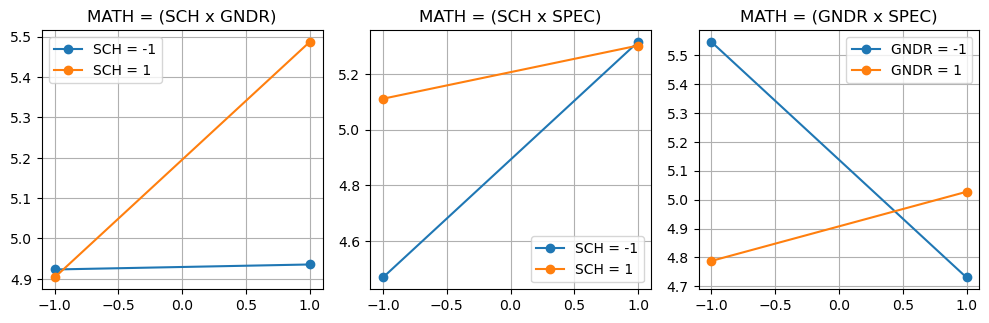

In [31]:
interaction_point_plot_math(file_path, y_math)

### c) Statistical Significance of the experiment: Analysis of Variance Test on Students' performance

HYPOTHESIS:

*for i = 1, 2, 3*

*Here the TAUs represent the treatment means, i.e. factors & their interactions*

* `Null Hypothesis, H0: TAU1 = TAU2 = TAU3 = 0`          

 *The null hypothesis is telling us that the factors & their interactions are the same and has no effect on the student's performance* 

* `Alternative Hypothesis, H1: TAUi != 0 at least one i` 
 
 *The alternative hypothesis is of the opinion that the factors & their interactions are not the same that at least one has an effect on the student's performance* 



DECISION RULE:

Reject null hypothesis, H0 if p-values is less than alpha = 0.05

#### (i) ANOVA Table

For the factorial analysis of variance, the following assumptions were made:

* The observations are independent
* Residuals are normally distributed
* Homogeneity of error variances

In [46]:
df_math = df_raw.copy()

# Fit the model
formula = 'MATH ~ SCH + GNDR + SPEC + SCH:GNDR + SCH:SPEC + GNDR:SPEC + SCH:GNDR:SPEC'

model = ols(formula, data=df_math).fit()
# Perform ANOVA and print the results
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
SCH,1.0,3.150000,3.150000,1.602414,0.207791
GNDR,1.0,3.071257,3.071257,1.562357,0.213532
SPEC,1.0,8.513053,8.513053,4.330613,0.039366
SCH:GNDR,1.0,2.070679,2.070679,1.053360,0.306612
SCH:SPEC,1.0,4.819629,4.819629,2.451758,0.119788
GNDR:SPEC,1.0,2.684991,2.684991,1.365862,0.244630
SCH:GNDR:SPEC,1.0,8.342527,8.342527,4.243866,0.041357
Residual,132.0,259.483578,1.965785,NaN,NaN


### d) Communicate result

Reading the ANOVA TABLE bottom to top:

* `SCH x GNDR x SPEC` 

DECISION RULE: Since the *p-value = 0.041357* is less than *alpha = 0.05*. We will reject the null hypothesis, H0 and conclude that interaction effect of School, Gender, and Specialization is significant.  

* `GNDR x SPEC` 

DECISION RULE: Since the *p-value = 0.2446* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of Gender and Specialization is not significant. 

* `SCH x SPEC` 

DECISION RULE:  Since the *p-value = 0.1198* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of School and Specialization is not significant.

* `SCH x GNDR` 

DECISION RULE:  Since the *p-value = 0.3066 is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of School&Gender is not significant.

* `SPEC` 

DECISION RULE:  Since the *p-value = 0.03937* is less than *alpha = 0.05*. We will reject the null hypothesis, H0 and conclude that single effect of Specialization is  significant.

* `GNDR` 

DECISION RULE:  Since the *p-value = 0.2135* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that single effect of Gender is not significant.

* `SCH` 

DECISION RULE:  Since the *p-value = 0.20779* is greater than *alpha = 0.05*. We will fail reject the null hypothesis, H0 and conclude that single effect of School is not significant.

# 6) Experiment on the Students' performance in English language

In [40]:
def main_effects_plot_eng(file_path, y_eng):
    # Load data from excel
    df = pd.read_excel(file_path)
    
    # Identify factors by excluding the result column
    factors = df.columns[:-3]
        
    # Calculate main effects
    main_effects = {}
    for factor in factors:
        mean_plus = df[df[factor] == 1][y_eng].mean()
        mean_minus = df[df[factor] == -1][y_eng].mean()
        main_effects[factor] = mean_plus - mean_minus
    # Plot main effects
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.bar(main_effects.keys(), main_effects.values())
    # Annotate the bars with their values
    for factor, value in main_effects.items():
        ax.text(factor, value + 0.01 * abs(value), '{:.2f}'.format(value), 
                        ha='center', va='bottom')
    ax.set_ylabel('Main Effect')
    ax.set_title('Main Effects Plot for English Score')
    plt.xticks(rotation=45, ha="right")
    plt.show()

### a) Main effect plot

In the effect plot below, SCH has a positively large effect on english performance. Suggesting that SCH maximizes the students' performance in the english exam if considered. While SPEC and GNDR has little or no significant effect on students' performance in the subject.

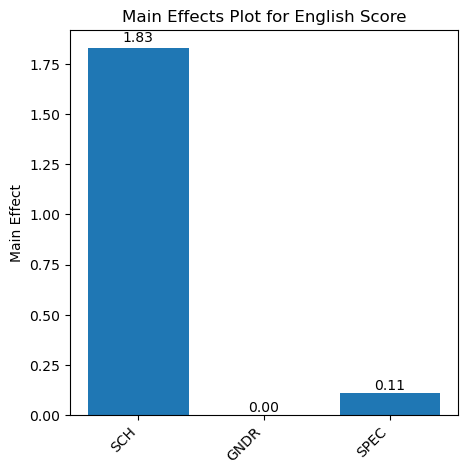

In [41]:
y_eng = "ENG"
main_effects_plot_eng(file_path, y_eng)

In [42]:
def interaction_point_plot_eng(file_path, y_eng):
    
    df = pd.read_excel(file_path)
    factors = df.columns[:-3]
    interactions = list(itertools.combinations(factors, 2))
    # Calculate number of rows and columns for subplots
    cols = 3
    rows = math.ceil(len(interactions) / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(10, 10*rows/3))
    for idx, interaction in enumerate(interactions):
        row = idx // cols
        col = idx % cols
        ax = axs[row, col] if rows > 1 else axs[col]
        for level in [-1, 1]:
            subset = df[df[interaction[0]] == level]
            ax.plot(subset[interaction[1]].unique(), 
subset.groupby(interaction[1])[y_eng].mean(), 'o-', 
label=f'{interaction[0]} = {level}')
        ax.set_title(f'ENG = ({interaction[0]} x {interaction[1]})')
        ax.legend()
        ax.grid(True)
    # Handle any remaining axes (if there's no data to plot in them)
    for idx in range(len(interactions), rows*cols):
        row = idx // cols
        col = idx % cols
        axs[row, col].axis('off')
    plt.tight_layout()
    plt.show()

### b) Interaction effect plot
Interpretations From *LEFT* to *RIGHT*

#### (i) SCH x GNDR (= public vs private x female vs male)

* The SCH x GNDR interaction plot indicates that the private school (1) has large positive effect on students' english performance with the female(-1) and male(1) relatively having the same score. Male students in the public had the lowest performance in the test.

#### (ii) SCH x SPEC (= public vs private x humanities vs science)

*  The SCH x SPEC interaction plot shows that the private school (1) has large positive effect on performance in the english exam with the score of students in the humanities and science fairly the same. While in the public school, humanities students performs slightly better than their science classmates.

#### (iii) GNDR x SPEC (= female vs male x humanities vs science)

* The GNDR x SPEC interactions shows that the female students in humanities had the best score in the english test. While the male science students had a better score than their male colleagues in the humanities. 

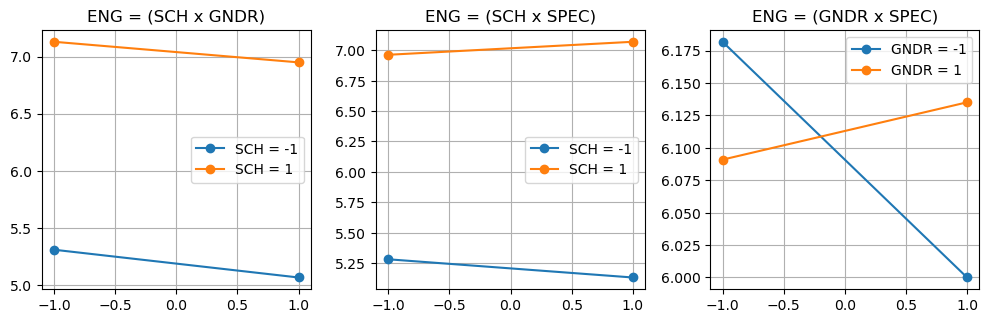

In [43]:
interaction_point_plot_eng(file_path, y_eng)

### c) Statistical Significance of the experiment: Analysis of Variance Test on Students' performance

HYPOTHESIS:

*for i = 1, 2, 3*

*Here the TAUs represent the treatment means, i.e. factors & their interactions*

* `Null Hypothesis, H0: TAU1 = TAU2 = TAU3 = 0`          

 *The null hypothesis is telling us that the factors & their interactions are the same and has no effect on the student's performance* 

* `Alternative Hypothesis, H1: TAUi != 0 at least one i` 
 
 *The alternative hypothesis is of the opinion that the factors & their interactions are not the same, that at least one has an effect on the student's performance* 



DECISION RULE:

Reject null hypothesis, H0 if p-values is less than alpha = 0.05

In [45]:
df_eng = df_raw.copy()

# Fit the model
formula = 'ENG ~ SCH + GNDR + SPEC + SCH:GNDR + SCH:SPEC + GNDR:SPEC + SCH:GNDR:SPEC'

model = ols(formula, data=df_eng).fit()
# Perform ANOVA and print the results
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
SCH,1.0,117.028571,117.028571,94.993671,3.065971e-17
GNDR,1.0,1.548765,1.548765,1.257154,2.642262e-01
SPEC,1.0,0.000650,0.000650,0.000528,9.817028e-01
SCH:GNDR,1.0,0.035173,0.035173,0.028550,8.660808e-01
SCH:SPEC,1.0,0.710493,0.710493,0.576717,4.489561e-01
GNDR:SPEC,1.0,0.383129,0.383129,0.310991,5.780170e-01
SCH:GNDR:SPEC,1.0,1.845692,1.845692,1.498173,2.231329e-01
Residual,132.0,162.618954,1.231962,NaN,NaN


### d) Communicate result

Reading the ANOVA TABLE bottom to top:

* `SCH x GNDR x SPEC` 

DECISION RULE: Since the *p-value = 0.18457* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of School, Gender, and Specialization is not significant.  

* `GNDR x SPEC` 

DECISION RULE: Since the *p-value = 0.5780* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of Gender and Specialization is not significant. 

* `SCH x SPEC` 

DECISION RULE:  Since the *p-value = 0.4489* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of School and Specialization is not significant.

* `SCH x GNDR` 

DECISION RULE:  Since the *p-value = 0.8661 is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that interaction effect of School&Gender is not significant.

* `SPEC` 

DECISION RULE:  Since the *p-value = 0.9817* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that single effect of Specialization is not  significant.

* `GNDR` 

DECISION RULE:  Since the *p-value = 0.2642* is greater than *alpha = 0.05*. We will fail to reject the null hypothesis, H0 and conclude that single effect of Gender is not significant.

* `SCH` 

DECISION RULE:  Since the *p-value = 0.0000* is less than *alpha = 0.05*. We will reject the null hypothesis, H0 and conclude that single effect of School is significant.

# 7) Key findings 

### > Conclusion

* In the maths + english exam, the private school had a positively large effect on the students' performance. And also, the students'
gender or specialization (humanities to science) had no signficant influence on their test score regardless of school type.

* Meanwhile in the maths exam, the combination effect of School and Specialization had significant influence on the students' performance.





### > Some key events in the experiment

For the Maths + Eng exam:

* The private school had the largest positive effect on the students' performance with the male students having a better performance. While in the public school, the male students had the lowest result compared to their female classmates.

* In the public school, Science students performed better than their colleagues in the humanities.

* Without School effect, female students in the humanities had the best test score. Female science students had the lowest test score.




For the Mathematics exam:

* In the private school, the male students performed better than their female classmates.

* Science students from both the private and public school performed equally on the test.

* Without School effect, female students in the humanities had the best result, whereas their male colleagues in the humanities had the lowest score.

For the English language exam:
 
* In the private school, the female and male performance were at par but tilted in the favour of female students. Meanwhile, male students in the public school had the lowest performance.

* In the public school, humanities students performed slightly better than their science classmates.

* Without School effect, female students in the humanities had the best test score. While the male science students had a better score than their male colleagues in the humanities.

###  > Threats to the Validity of the Experiment:

* There was no randomization in the selection of the two participating schools.

* Cases of exam malpractice or cheating might have influenced the results.

* The label "Humanities" is a combination of two classes: the "Commercial" and "Arts" classes.

* The data has uneven distribution of students in Science (=81) and Humanities(=59)

#  References

[1]  https://www.experimentaldesignhub.com/ Example of a Full Factorial Design in Python by Marcel Butschle

[2] Douglas C. Montgomery (2012) Design and Analysis of Experiments, Arizona State University

[3] Glewe, P. (2002) Schools and skills in developing countries: Education policies and Socio-Economical Outcomes. Journal of Economics Literature

[4] Farooq, M.S., Shafiq, M. and Berhanu, G (2011). Factors Affecting Students' Quality of Academic Performance; A Case Study of Secondary School
